# Klasifikasi Health Issues Berdasarkan Gaya Hidup dan Konsumsi Kopi Menggunakan Algoritma Random Forest

Pada project akhir mata kuliah Data Sains ini kami menggunakan algoritma Random Forest untuk melakukan klasifikasi terhadap variabel Health_Issues pada dataset Global Coffee Health Dataset.
Tujuan utamanya adalah memprediksi apakah kondisi kesehatan seseorang berada pada kategori None, Mild, atau Severe berdasarkan beberapa faktor gaya hidup seperti konsumsi kopi, kualitas tidur, tingkat stres, BMI, dan kebiasaan merokok/alkohol.

Random Forest dipilih karena stabil, akurat untuk data tabular, mampu menangani banyak fitur sekaligus, dan tidak mudah mengalami overfitting. Algoritma ini juga dapat memberikan feature importance untuk mengetahui variabel yang paling berpengaruh.

Alur Pengerjaan:
1.   Load dataset.
2.   Preprocessing (handle missing value, encoding data kategorikal).
3. Membagi data menjadi train dan test set.
4. Melatih model Random Forest.
5. Evaluasi model menggunakan accuracy, classification report, dan confusion matrix.
6. Melihat feature importance untuk mengetahui faktor yang paling mempengaruhi hasil prediksi.

Target Prediksi: Kolom Health_Issues sebagai label (multiclass classification).

Random Forest bekerja dengan membuat banyak decision tree, lalu setiap tree melakukan voting. Hasil voting terbanyak menjadi prediksi akhir.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving synthetic_coffee_health_10000.csv to synthetic_coffee_health_10000.csv


In [ ]:
df = pd.read_csv('synthetic_coffee_health_10000.csv')

In [ ]:
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [ ]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0


In [ ]:
print("Persentase missing value di kolom Health_Issues:", (df['Health_Issues'].isnull().sum() / len(df)) * 100, "%")

Persentase missing value di kolom Health_Issues: 59.41 %


Karena missing values di kolom Health_Issues sebanyak 59.41%, kami memilih untuk drop rows yg ada missing values.

In [ ]:
df = df.dropna(subset=['Health_Issues'])

In [ ]:
print("Dataset shape setelah drop missing values:", df.shape)

Dataset shape setelah drop missing values: (4059, 16)


In [ ]:
print("Missing values setelah cleaning:")
print(df.isnull().sum())

Missing values setelah cleaning:
ID                         0
Age                        0
Gender                     0
Country                    0
Coffee_Intake              0
Caffeine_mg                0
Sleep_Hours                0
Sleep_Quality              0
BMI                        0
Heart_Rate                 0
Stress_Level               0
Physical_Activity_Hours    0
Health_Issues              0
Occupation                 0
Smoking                    0
Alcohol_Consumption        0
dtype: int64


In [ ]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000,4059.000000
mean,5008.735403,38.009116,2.702365,256.802735,5.748904,24.722567,70.874600,7.446612,0.196600,0.294900
std,2872.905523,12.914080,1.470565,139.660870,1.134653,4.363655,9.780982,4.325022,0.397476,0.456054
min,3.000000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.000000,0.000000,0.000000
25%,2511.500000,28.000000,1.600000,155.200000,5.000000,21.700000,64.000000,3.700000,0.000000,0.000000
50%,5031.000000,37.000000,2.700000,255.000000,5.600000,24.500000,71.000000,7.400000,0.000000,0.000000
75%,7497.500000,49.000000,3.700000,351.300000,6.100000,27.700000,78.000000,11.200000,0.000000,1.000000
max,9997.000000,80.000000,7.800000,742.200000,10.000000,38.200000,103.000000,15.000000,1.000000,1.000000


In [ ]:
df['Health_Issues'].value_counts()

,count
Health_Issues,
Mild,3579
Moderate,463
Severe,17


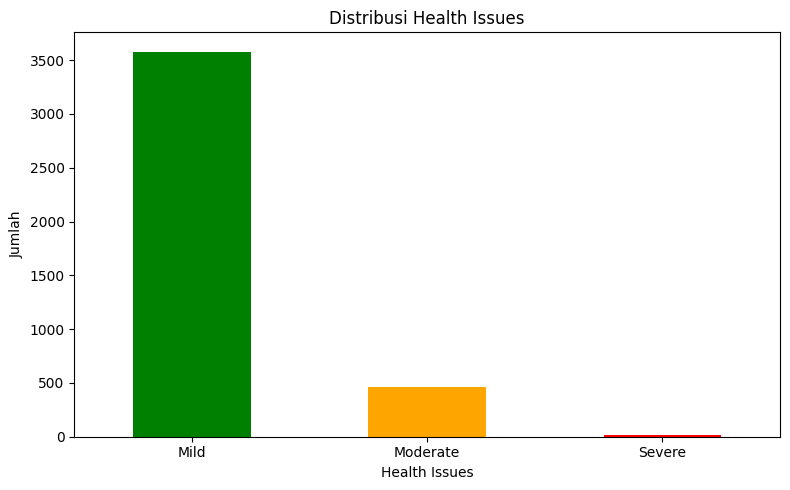

In [ ]:
plt.figure(figsize=(8, 5))
df['Health_Issues'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Distribusi Health Issues')
plt.xlabel('Health Issues')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

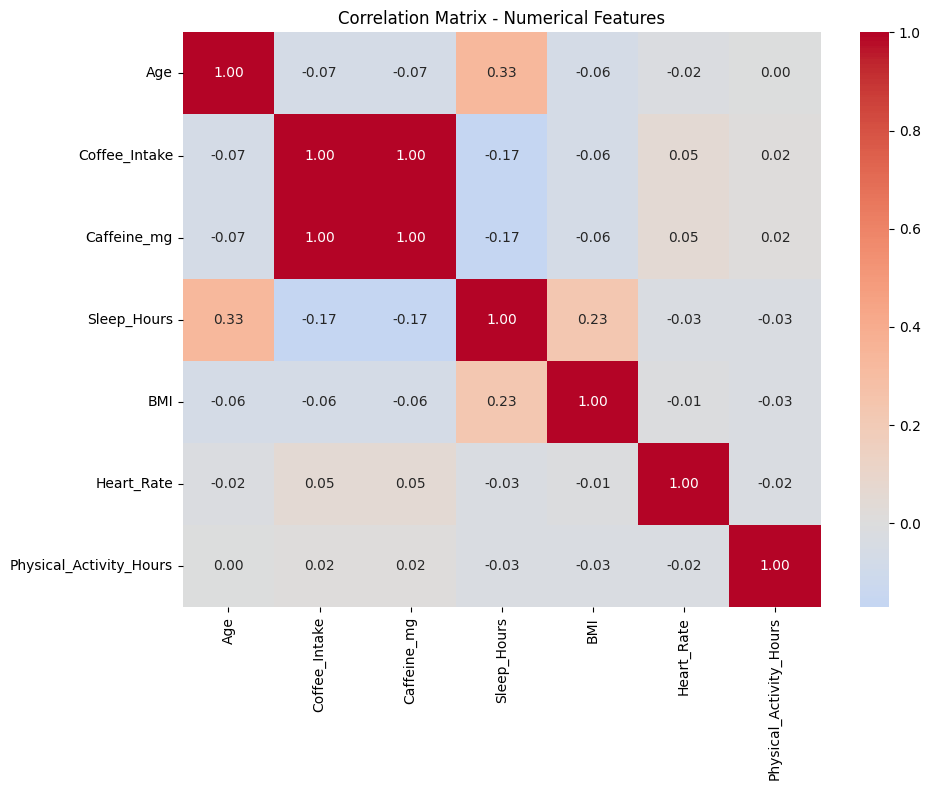

In [ ]:
numerical_cols = ['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours',
                  'BMI', 'Heart_Rate', 'Physical_Activity_Hours']
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix - Numerical Features')
plt.tight_layout()
plt.show()

drop salah satu antara Coffee_Intake atau Caffeine_mg karena redundan (korelasi 1.0). Kami memilih Caffeine_mg karena lebih presisi dalam ukuran.

In [ ]:
df = df.drop('Coffee_Intake', axis=1)

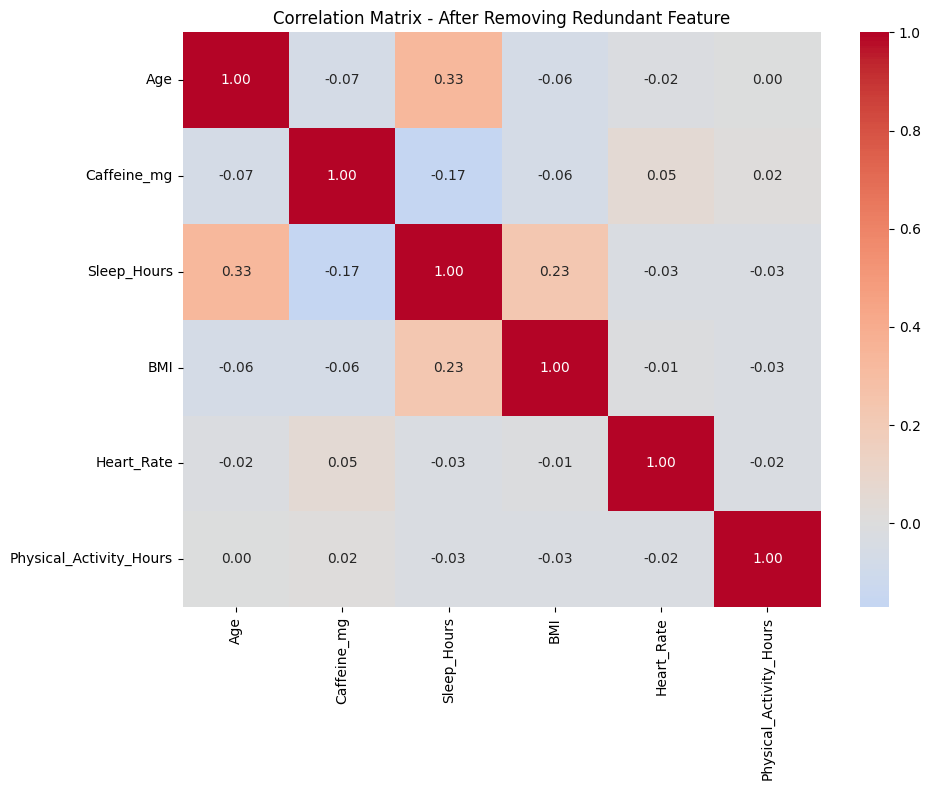

In [ ]:
numerical_cols = ['Age', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours']
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix - After Removing Redundant Feature')
plt.tight_layout()
plt.show()

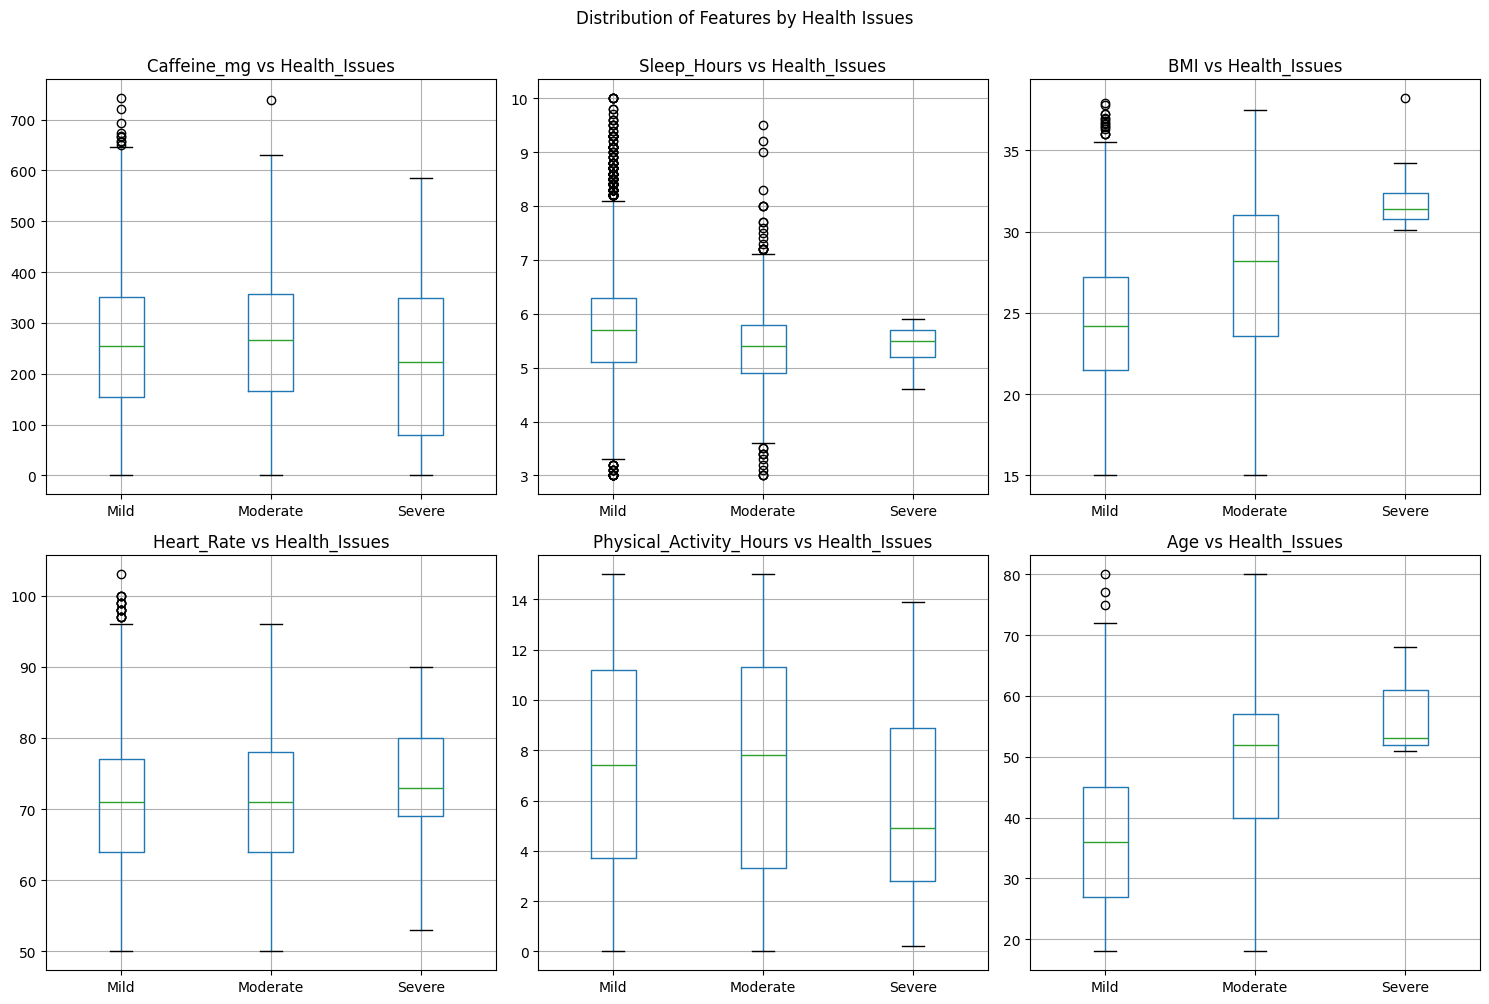

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

features_to_plot = ['Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate',
                    'Physical_Activity_Hours', 'Age']

for idx, col in enumerate(features_to_plot):
    if col in df.columns:
        df.boxplot(column=col, by='Health_Issues', ax=axes[idx])
        axes[idx].set_title(f'{col} vs Health_Issues')
        axes[idx].set_xlabel('')
        axes[idx].get_figure().suptitle('')

plt.suptitle('Distribution of Features by Health Issues', y=1.00)
plt.tight_layout()
plt.show()

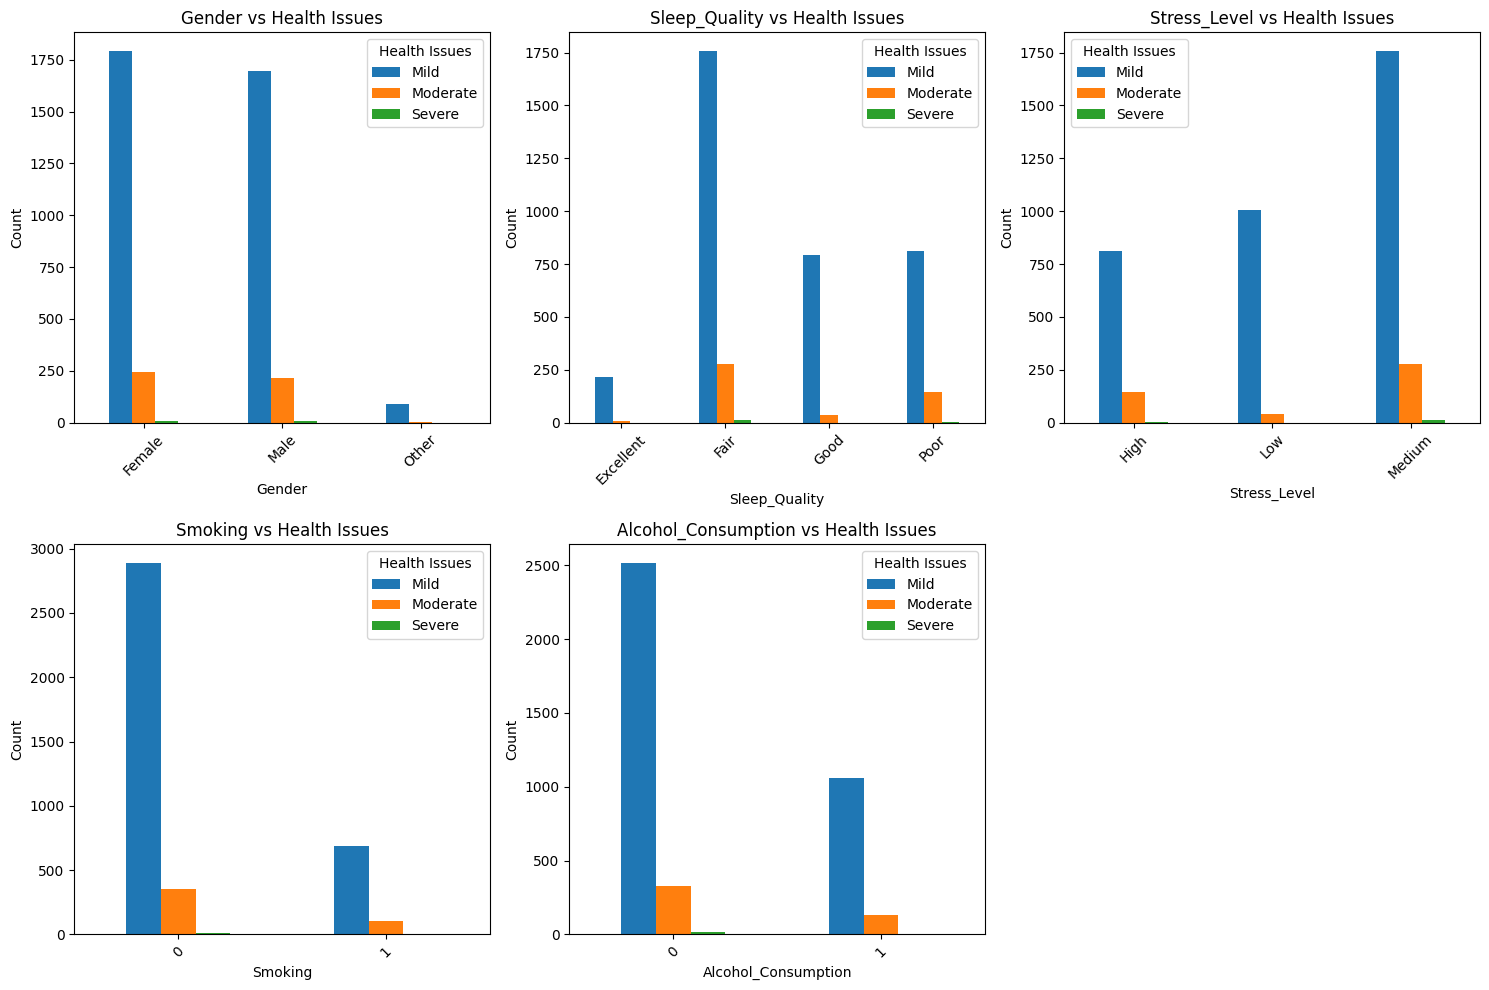

In [ ]:
categorical_features = ['Gender', 'Sleep_Quality', 'Stress_Level', 'Smoking', 'Alcohol_Consumption']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    if col in df.columns:
        pd.crosstab(df[col], df['Health_Issues']).plot(kind='bar', ax=axes[idx], stacked=False)
        axes[idx].set_title(f'{col} vs Health Issues')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].legend(title='Health Issues')
        axes[idx].tick_params(axis='x', rotation=45)

if len(categorical_features) < len(axes):
    for i in range(len(categorical_features), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Pre-Processing**

In [ ]:
df_processed = df.copy()

if 'ID' in df_processed.columns:
    df_processed = df_processed.drop('ID', axis=1)

categorical_cols = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level',
                    'Occupation', 'Smoking', 'Alcohol_Consumption']

print("Unique values per categorical column:")
for col in categorical_cols:
    if col in df_processed.columns:
        print(f"{col}: {df_processed[col].nunique()} unique values")
        print(f"  Values: {df_processed[col].unique()[:10]}")

Unique values per categorical column:
Gender: 3 unique values
  Values: ['Male' 'Female' 'Other']
Country: 20 unique values
  Values: ['Brazil' 'Germany' 'Spain' 'France' 'Canada' 'Switzerland' 'Mexico'
 'China' 'Italy' 'Belgium']
Sleep_Quality: 4 unique values
  Values: ['Fair' 'Good' 'Poor' 'Excellent']
Stress_Level: 3 unique values
  Values: ['Medium' 'Low' 'High']
Occupation: 5 unique values
  Values: ['Office' 'Other' 'Student' 'Service' 'Healthcare']
Smoking: 2 unique values
  Values: [0 1]
Alcohol_Consumption: 2 unique values
  Values: [0 1]


In [ ]:
sleep_quality_map = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
stress_level_map = {'Low': 0, 'Medium': 1, 'High': 2}
health_issues_map = {'Mild': 0, 'Moderate': 1, 'Severe': 2}

if 'Sleep_Quality' in df_processed.columns:
    df_processed['Sleep_Quality'] = df_processed['Sleep_Quality'].map(sleep_quality_map)
    print(f"Sleep_Quality encoded: {df_processed['Sleep_Quality'].value_counts().sort_index().to_dict()}")

if 'Stress_Level' in df_processed.columns:
    df_processed['Stress_Level'] = df_processed['Stress_Level'].map(stress_level_map)
    print(f"Stress_Level encoded: {df_processed['Stress_Level'].value_counts().sort_index().to_dict()}")

if 'Health_Issues' in df_processed.columns:
    df_processed['Health_Issues'] = df_processed['Health_Issues'].map(health_issues_map)
    print(f"Health_Issues encoded: {df_processed['Health_Issues'].value_counts().sort_index().to_dict()}")

le = LabelEncoder()
simple_nominal = ['Gender', 'Smoking']

for col in simple_nominal:
    if col in df_processed.columns:
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        print(f"{col} encoded")

onehot_cols = ['Country', 'Occupation', 'Alcohol_Consumption']
for col in onehot_cols:
    if col in df_processed.columns:
        dummies = pd.get_dummies(df_processed[col], prefix=col, drop_first=True)
        df_processed = pd.concat([df_processed, dummies], axis=1)
        df_processed = df_processed.drop(col, axis=1)
        print(f"{col} one-hot encoded into {len(dummies.columns)} columns")

print("\nDataset shape after encoding:", df_processed.shape)
print("Missing values setelah encoding:", df_processed.isnull().sum().sum())

Sleep_Quality encoded: {0: 961, 1: 2050, 2: 826, 3: 222}
Stress_Level encoded: {0: 1048, 1: 2050, 2: 961}
Health_Issues encoded: {0: 3579, 1: 463, 2: 17}
Gender encoded
Smoking encoded
Country one-hot encoded into 19 columns
Occupation one-hot encoded into 4 columns
Alcohol_Consumption one-hot encoded into 1 columns

Dataset shape after encoding: (4059, 35)
Missing values setelah encoding: 0


**Split dataset menjadi train test dan split test**

In [ ]:
X = df_processed.drop('Health_Issues', axis=1)
y = df_processed['Health_Issues']

print("Feature shape:", X.shape)
print("\nTarget distribution:")
print(y.value_counts().sort_index())
print("\nPersentase target:")
print(y.value_counts(normalize=True).sort_index() * 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                      random_state=42,
                                                      stratify=y)

print("\nTraining set:", X_train.shape)
print("Test set:", X_test.shape)
print("\nTarget distribution in training set:")
print(pd.Series(y_train).value_counts().sort_index())
print("\nTarget distribution in test set:")
print(pd.Series(y_test).value_counts().sort_index())

Feature shape: (4059, 34)

Target distribution:
Health_Issues
0    3579
1     463
2      17
Name: count, dtype: int64

Persentase target:
Health_Issues
0    88.174427
1    11.406750
2     0.418822
Name: proportion, dtype: float64

Training set: (3247, 34)
Test set: (812, 34)

Target distribution in training set:
Health_Issues
0    2863
1     370
2      14
Name: count, dtype: int64

Target distribution in test set:
Health_Issues
0    716
1     93
2      3
Name: count, dtype: int64


**Baseline model**

Accuracy: 0.9877
F1-Score (weighted): 0.9869
F1-Score (macro): 0.8130

Classification Report:
              precision    recall  f1-score   support

        Mild       0.99      1.00      0.99       716
    Moderate       0.98      0.91      0.94        93
      Severe       1.00      0.33      0.50         3

    accuracy                           0.99       812
   macro avg       0.99      0.75      0.81       812
weighted avg       0.99      0.99      0.99       812



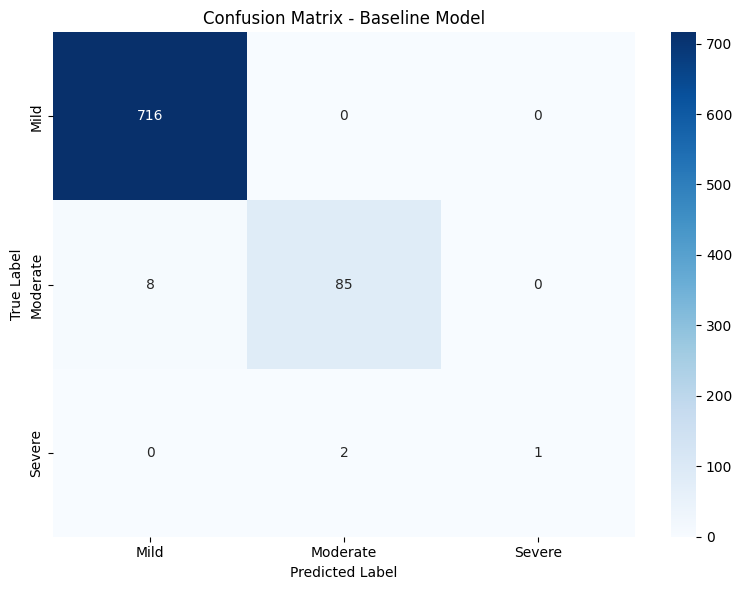

In [ ]:
rf_baseline = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_baseline.fit(X_train, y_train)
y_pred_baseline = rf_baseline.predict(X_test)

target_names = ['Mild', 'Moderate', 'Severe']

print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")
print(f"F1-Score (weighted): {f1_score(y_test, y_pred_baseline, average='weighted'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, y_pred_baseline, average='macro'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline, target_names=target_names))

cm_baseline = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Baseline Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

**Hyperparameter tuning**

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]
}

rf_tuned = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(rf_tuned, param_grid, cv=5,
                          scoring='f1_weighted', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("\nBest parameters:")
print(grid_search.best_params_)
print(f"Best CV F1-score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best parameters:
{'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best CV F1-score: 0.9872


In [ ]:
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"F1-Score (weighted): {f1_score(y_test, y_pred_tuned, average='weighted'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, y_pred_tuned, average='macro'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=target_names))

Accuracy: 0.9840
F1-Score (weighted): 0.9820
F1-Score (macro): 0.6404

Classification Report:
              precision    recall  f1-score   support

        Mild       0.99      1.00      0.99       716
    Moderate       0.95      0.90      0.93        93
      Severe       0.00      0.00      0.00         3

    accuracy                           0.98       812
   macro avg       0.65      0.63      0.64       812
weighted avg       0.98      0.98      0.98       812



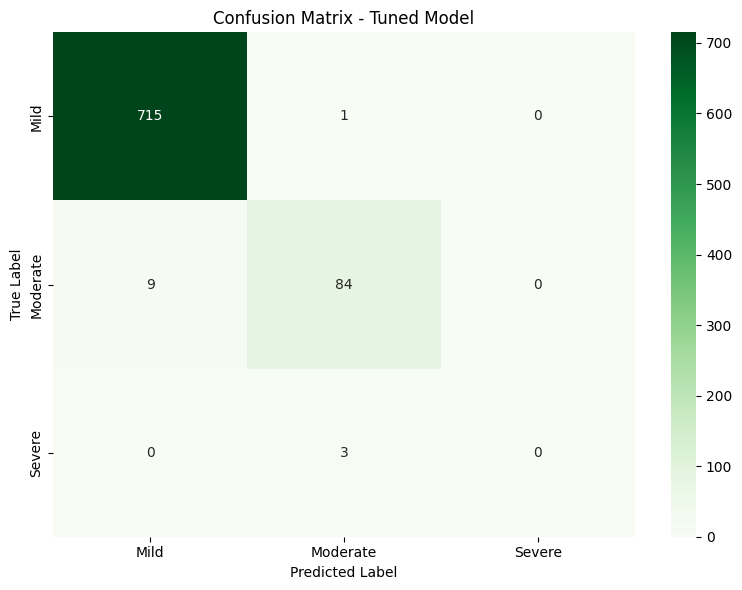

In [ ]:
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Tuned Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

Model Random Forest dengan hyperparameter tuning berhasil mencapai accuracy 98.40% dan F1-Score weighted 0.98. Model sangat baik dalam mengklasifikasi Health Issues kategori Mild dan Moderate. Namun model gagal memprediksi kelas Severe karena extreme class imbalance (hanya 17 sampel dari 4059 total data atau 0.4%). Ini merupakan limitasi dataset, bukan limitasi model.

Top 15 Most Important Features:
                    feature  importance
5                       BMI    0.287236
0                       Age    0.277283
3               Sleep_Hours    0.068350
2               Caffeine_mg    0.054621
8   Physical_Activity_Hours    0.054347
7              Stress_Level    0.048894
6                Heart_Rate    0.042092
4             Sleep_Quality    0.038011
29        Occupation_Office    0.015568
31       Occupation_Service    0.013009
1                    Gender    0.011950
9                   Smoking    0.010366
33    Alcohol_Consumption_1    0.008995
30         Occupation_Other    0.008779
32       Occupation_Student    0.007198


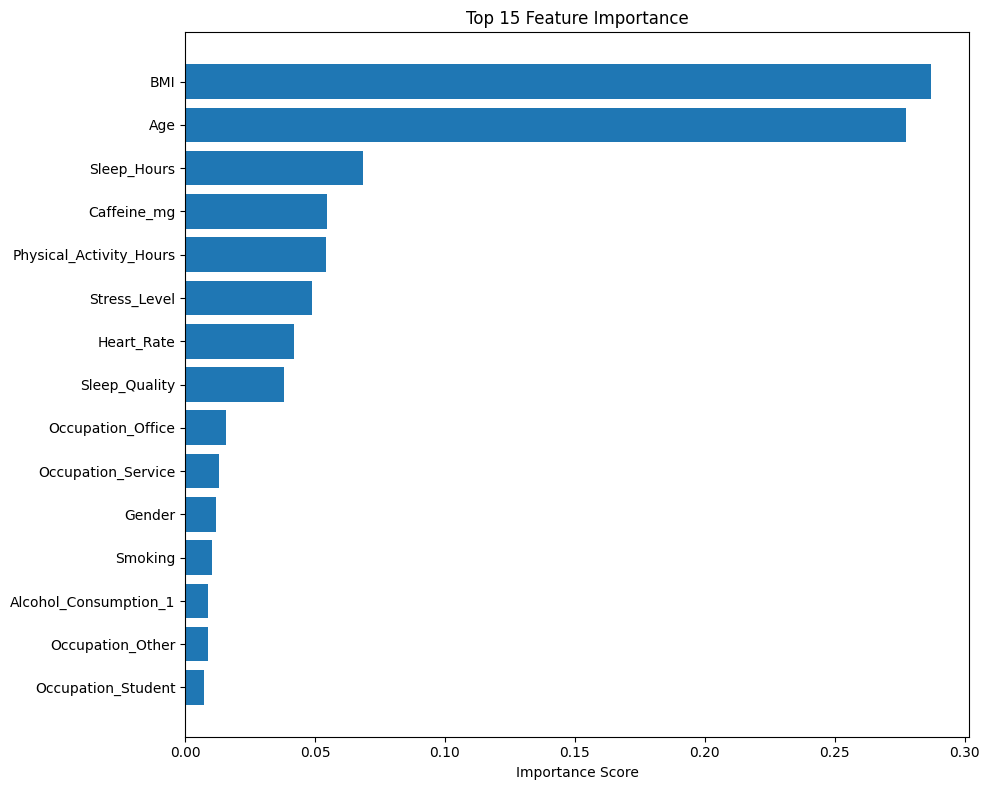

In [ ]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features:")
print(feature_importance.head(15))

plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance Score')
plt.title('Top 15 Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
print(f"Model: Random Forest Classifier")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"\nPerforma pada Test Set:")
print(f"  - Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"  - F1-Score (Weighted): {f1_score(y_test, y_pred_tuned, average='weighted'):.4f}")
print(f"  - F1-Score (Macro): {f1_score(y_test, y_pred_tuned, average='macro'):.4f}")
print(f"\nTop 5 Fitur Terpenting:")
for i in range(5):
    print(f"  {i+1}. {feature_importance.iloc[i]['feature']} ({feature_importance.iloc[i]['importance']:.4f})")
print(f"\nLimitasi: Kelas Severe gagal diprediksi karena extreme imbalance (hanya 17 sampel dari 4059)")

Model: Random Forest Classifier
Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Performa pada Test Set:
  - Accuracy: 0.9840
  - F1-Score (Weighted): 0.9820
  - F1-Score (Macro): 0.6404

Top 5 Fitur Terpenting:
  1. BMI (0.2872)
  2. Age (0.2773)
  3. Sleep_Hours (0.0684)
  4. Caffeine_mg (0.0546)
  5. Physical_Activity_Hours (0.0543)

Limitasi: Kelas Severe gagal diprediksi karena extreme imbalance (hanya 17 sampel dari 4059)
